In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats

In [2]:
X = np.array(
    [3, 5, 7, 9, 10]
)
Y = np.array([
    14.5, 35.7, 62.8, 100, 121
])
n = Y.shape[0]

In [3]:
Z = np.vstack([np.ones(n), X, X*X])
A = Z @ Z.T
B = np.linalg.inv(A)

In [4]:
w = B @ Z @ Y
w

array([-0.79666931,  2.16582078,  1.00130849])

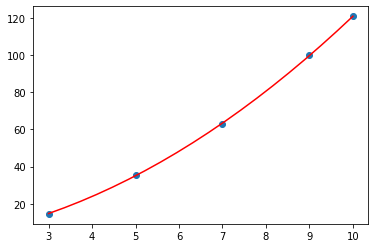

In [9]:
s = X.argsort()
plt.scatter(X, Y)

xs = np.linspace(3,10,20)
ys = w[0] + w[1]*xs + w[2]*xs*xs
plt.plot(xs,ys, c='r')

In [10]:
S = np.square(Y - w @ Z).sum()
S

0.8822283901665476

In [12]:
Ainv_ii = np.linalg.inv(A)[2,2]
Ainv_ii

0.008128469468675568

In [13]:
t_crit = sp.stats.t(n-3).ppf(0.5 + 0.95/2)
t_crit

4.302652729911275

In [14]:
d = np.sqrt( S * Ainv_ii / (n-3) ) * t_crit
d

0.25764172693783616

In [15]:
w[2] - d, w[2] + d

(0.7436667583913081, 1.2589502122669805)

In [16]:
g1 = sp.stats.chi2(n-3).ppf(0.5-0.95/2)
g2 = sp.stats.chi2(n-3).ppf(0.5+0.95/2)
S/g2, S/g1

(0.11957945510833423, 17.423080045357487)